<a href="https://colab.research.google.com/github/yashasvi000/PRODIGY_DS_04/blob/main/Task_ds_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (first time only)
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv("twitter_training.csv")

print("Shape:", df.shape)
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Shape: (74681, 4)


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [2]:
# Step 2: Check columns and basic info
print("Columns:", df.columns.tolist())
print(df.info())
print("\nSample data:")
print(df.head(10))

Columns: ['2401', 'Borderlands', 'Positive', 'im getting on borderlands and i will murder you all ,']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

Sample data:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   
5  2402  Borderland

In [3]:
# Step 3: Clean text data
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#", "", text)        # remove hashtags symbol
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)  # remove special chars
    text = text.lower().strip()
    return text

df['clean_text'] = df.iloc[:, -1].apply(clean_text)  # last column usually text
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",clean_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [4]:
# Step 4: Apply VADER sentiment
sid = SentimentIntensityAnalyzer()

df['scores'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x))
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])

# Categorize based on compound score
def get_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_sentiment'] = df['compound'].apply(get_sentiment)

df[['clean_text','compound','vader_sentiment']].head(10)

,clean_text,compound,vader_sentiment
0,i am coming to the borders and i will kill you...,-0.6908,Negative
1,im getting on borderlands and i will kill you all,-0.6908,Negative
2,im coming on borderlands and i will murder you...,-0.6908,Negative
3,im getting on borderlands 2 and i will murder ...,-0.6908,Negative
4,im getting into borderlands and i can murder y...,-0.6908,Negative
5,so i spent a few hours making something for fu...,0.9222,Positive
6,so i spent a couple of hours doing something f...,0.9485,Positive
7,so i spent a few hours doing something for fun...,0.7676,Positive
8,so i spent a few hours making something for fu...,0.9222,Positive
9,2010 so i spent a few hours making something f...,0.9222,Positive


In [5]:
# Step 5: Compare dataset labels vs VADER results (if dataset has a sentiment column)
if 'sentiment' in df.columns or 'Sentiment' in df.columns:
    true_col = 'sentiment' if 'sentiment' in df.columns else 'Sentiment'
    print("\nOriginal sentiment distribution:")
    print(df[true_col].value_counts())

print("\nVADER sentiment distribution:")
print(df['vader_sentiment'].value_counts())


VADER sentiment distribution:
vader_sentiment
Positive    33326
Negative    27598
Neutral     13757
Name: count, dtype: int64


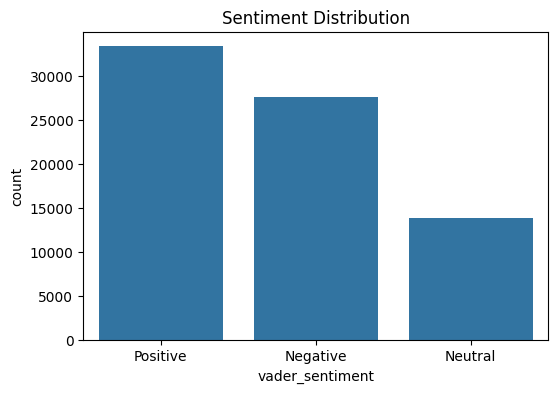

In [6]:
# Step 6: Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='vader_sentiment', data=df, order=['Positive','Negative','Neutral'])
plt.title("Sentiment Distribution")
plt.show()

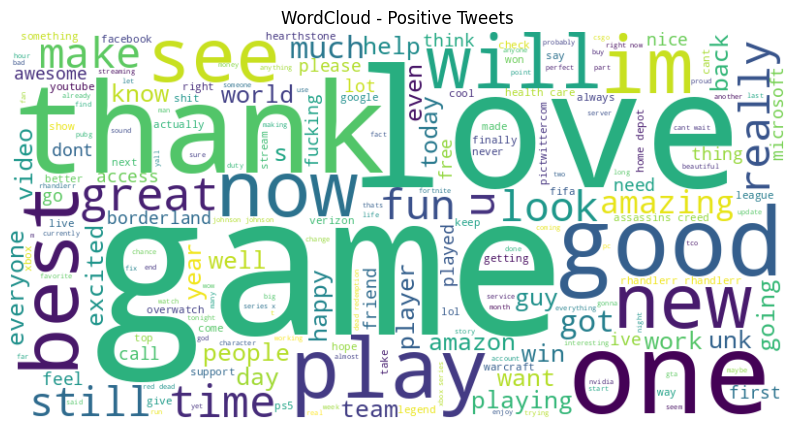

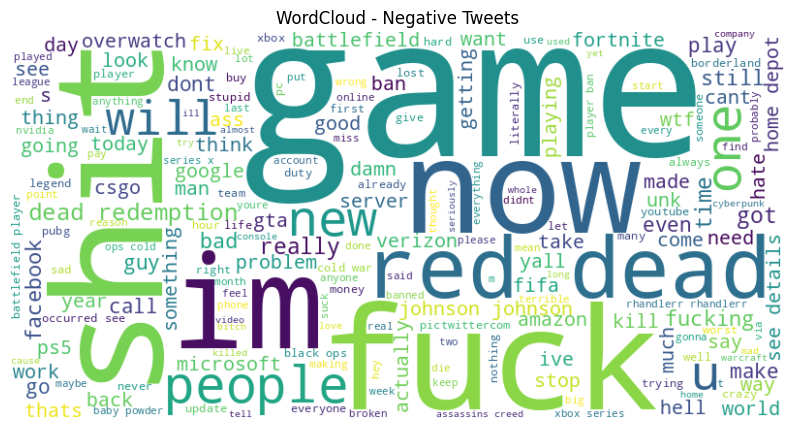

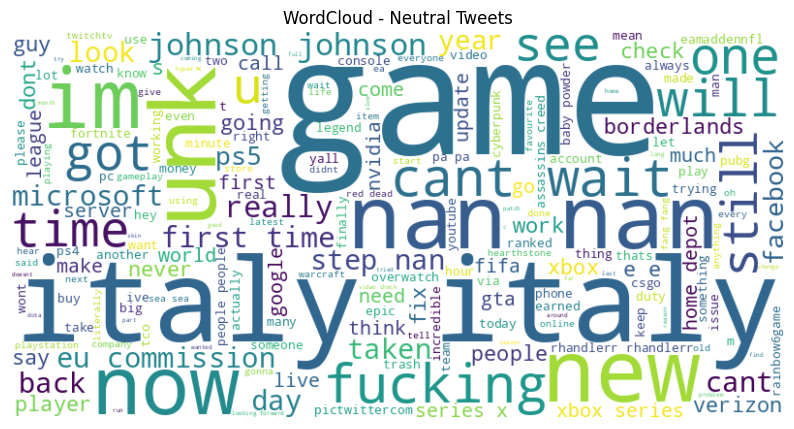

In [7]:
# Step 7: WordClouds for each sentiment
for sentiment in ['Positive','Negative','Neutral']:
    text = " ".join(df[df['vader_sentiment']==sentiment]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud - {sentiment} Tweets")
    plt.show()